3. 데이터 불러오기


In [2]:
import pandas as pd
import numpy as np

# 소수점 설정
pd.options.display.float_format = "{:,.1f}".format

# CSV 파일 불러오기
df_income_csv = pd.read_csv(r'data\Dehejia_and_Wahba_1999\data_cps78_income.csv')
print(df_income_csv.dtypes)
df_income_csv

Unnamed: 0           int64
income_78          float64
edu_year             int64
age                  int64
edu_level           object
income_at_23       float64
ln_income_at_23    float64
dtype: object


,Unnamed: 0,income_78,edu_year,age,edu_level,income_at_23,ln_income_at_23
0,0,"9,930.0",11,37,Secondary,"46,406.2",10.7
1,1,"3,595.9",9,22,Secondary,"16,804.7",9.7
2,2,"24,909.5",12,30,Secondary,"116,409.6",11.7
3,3,"7,506.1",11,27,Secondary,"35,078.6",10.5
4,4,289.8,8,33,Secondary,"1,354.3",7.2
...,...,...,...,...,...,...,...
13955,13955,"2,757.4",12,22,Secondary,"12,886.4",9.5
13956,13956,"6,895.1",12,20,Secondary,"32,222.8",10.4
13957,13957,"4,221.9",12,37,Secondary,"19,730.1",9.9
13958,13958,"13,671.9",9,47,Secondary,"63,893.2",11.1


In [3]:
# Excel 불러오기
df_income_xlsx = pd.read_excel(r'data\Dehejia_and_Wahba_1999\data_cps78_income.xlsx')
print(df_income_xlsx.dtypes)
df_income_xlsx

Unnamed: 0           int64
income_78          float64
edu_year             int64
age                  int64
edu_level           object
income_at_23       float64
ln_income_at_23    float64
dtype: object


,Unnamed: 0,income_78,edu_year,age,edu_level,income_at_23,ln_income_at_23
0,0,"9,930.0",11,37,Secondary,"46,406.2",10.7
1,1,"3,595.9",9,22,Secondary,"16,804.7",9.7
2,2,"24,909.4",12,30,Secondary,"116,409.6",11.7
3,3,"7,506.1",11,27,Secondary,"35,078.6",10.5
4,4,289.8,8,33,Secondary,"1,354.3",7.2
...,...,...,...,...,...,...,...
13955,13955,"2,757.4",12,22,Secondary,"12,886.4",9.5
13956,13956,"6,895.1",12,20,Secondary,"32,222.8",10.4
13957,13957,"4,221.9",12,37,Secondary,"19,730.1",9.9
13958,13958,"13,671.9",9,47,Secondary,"63,893.2",11.1


In [4]:
# 파이썬 파일로 불러오기
df_income_pkl = pd.read_pickle(r'data\Dehejia_and_Wahba_1999\data_cps78_income.pkl')
print(df_income_pkl.dtypes)
df_income_pkl

income_78           float32
edu_year             object
age                    int8
edu_level          category
income_at_23        float32
ln_income_at_23     float32
dtype: object


,income_78,edu_year,age,edu_level,income_at_23,ln_income_at_23
0,"9,930.0",11,37,Secondary,"46,406.2",10.7
1,"3,595.9",9,22,Secondary,"16,804.7",9.7
2,"24,909.4",12,30,Secondary,"116,409.6",11.7
3,"7,506.1",11,27,Secondary,"35,078.6",10.5
4,289.8,8,33,Secondary,"1,354.3",7.2
...,...,...,...,...,...,...
13955,"2,757.4",12,22,Secondary,"12,886.4",9.5
13956,"6,895.1",12,20,Secondary,"32,222.8",10.4
13957,"4,221.9",12,37,Secondary,"19,730.1",9.9
13958,"13,671.9",9,47,Secondary,"63,893.2",11.1


4. 기초통계량

In [5]:
df_income_pkl.describe()

,income_78,age,income_at_23,ln_income_at_23
count,"13,960.0","13,960.0","13,960.0","13,960.0"
mean,"17,091.9",32.8,"79,875.6",11.0
std,"8,267.0",10.9,"38,634.5",1.0
min,3.0,16.0,13.8,2.6
25%,"10,385.5",24.0,"48,534.5",10.8
50%,"18,951.1",31.0,"88,564.4",11.4
75%,"25,564.7",41.0,"119,471.7",11.7
max,"60,307.9",55.0,"281,837.8",12.5


In [6]:

df_income_pkl.groupby('edu_level').describe().T

C:\Users\SeanJ\AppData\Local\Temp\ipykernel_3972\720780539.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_income_pkl.groupby('edu_level').describe().T


edu_level                  None  Elementary  Secondary  Post-Secondary  \
income_78       count      27.0       490.0    9,125.0         3,550.0   
                mean    9,262.9    14,462.5   16,483.2        18,471.3   
                std     6,665.9     7,839.9    8,221.8         8,168.2   
                min       220.2       106.4        3.0             4.4   
                25%     4,914.9     8,064.7    9,686.5        13,010.3   
                50%     8,426.0    14,407.1   17,685.4        21,827.5   
                75%    12,460.9    21,067.9   25,564.7        25,564.7   
                max    25,564.7    25,564.7   60,307.9        36,646.9   
age             count      27.0       490.0    9,125.0         3,550.0   
                mean       42.0        41.5       32.7            31.4   
                std        10.1         9.5       11.6             9.2   
                min        22.0        16.0       16.0            17.0   
                25%        33.5        35.0       22.0            25.0   
                50%        44.0        43.0       31.0            29.0   
                75%        50.0        49.0       42.0            36.0   
                max        55.0        55.0       55.0            55.0   
income_at_23    count      27.0       490.0    9,125.0         3,550.0   
                mean   43,288.6    67,587.7   77,031.2        86,322.2   
                std    31,152.0    36,638.2   38,423.2        38,172.6   
                min     1,029.0       497.2       13.8            20.7   
                25%    22,969.0    37,688.8   45,268.0        60,801.1   
                50%    39,377.3    67,328.9   82,649.5       102,006.7   
                75%    58,233.8    98,457.1  119,471.7       119,471.7   
                max   119,471.7   119,471.7  281,837.8       171,262.7   
ln_income_at_23 count      27.0       490.0    9,125.0         3,550.0   
                mean       10.3        10.8       11.0            11.1   
                std         1.1         0.9        1.0             1.0   
                min         6.9         6.2        2.6             3.0   
                25%        10.0        10.5       10.7            11.0   
                50%        10.6        11.1       11.3            11.5   
                75%        11.0        11.5       11.7            11.7   
                max        11.7        11.7       12.5            12.1   

edu_level              Higher Edu  
income_78       count       768.0  
                mean     19,900.0  
                std       7,911.8  
                min          82.8  
                25%      15,411.9  
                50%      25,564.7  
                75%      25,564.7  
                max      25,564.7  
age             count       768.0  
                mean         33.9  
                std           8.1  
                min          20.0  
                25%          28.0  
                50%          32.0  
                75%          38.0  
                max          55.0  
income_at_23    count       768.0  
                mean     92,998.9  
                std      36,974.1  
                min         386.7  
                25%      72,024.9  
                50%     119,471.7  
                75%     119,471.7  
                max     119,471.7  
ln_income_at_23 count       768.0  
                mean         11.2  
                std           0.9  
                min           6.0  
                25%          11.2  
                50%          11.7  
                75%          11.7  
                max          11.7

C:\Users\SeanJ\AppData\Local\Temp\ipykernel_3972\4036805836.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_income_pkl.groupby('edu_level')['income_at_23'].apply(np.nanmean).plot(kind='bar')


<Axes: xlabel='edu_level'>

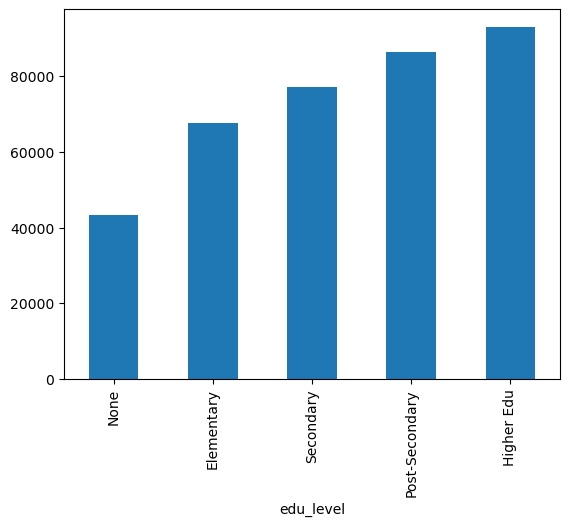

In [7]:
df_income_pkl.groupby('edu_level')['income_at_23'].apply(np.nanmean).plot(kind='bar')

<Axes: title={'center': 'income_at_23'}, xlabel='[edu_level]'>

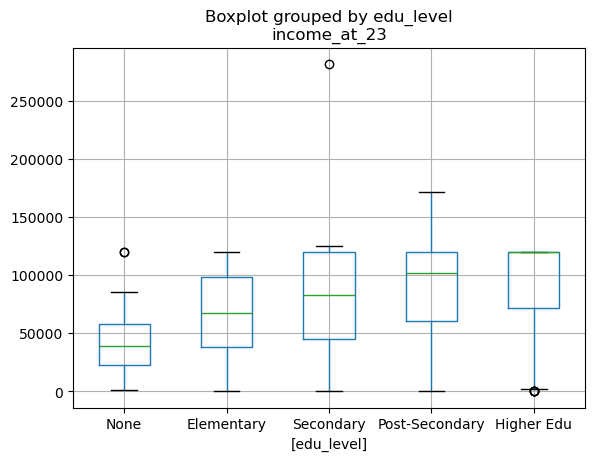

In [8]:
df_income_pkl[['income_at_23','edu_level']].boxplot(by='edu_level')

<Axes: xlabel='edu_year'>

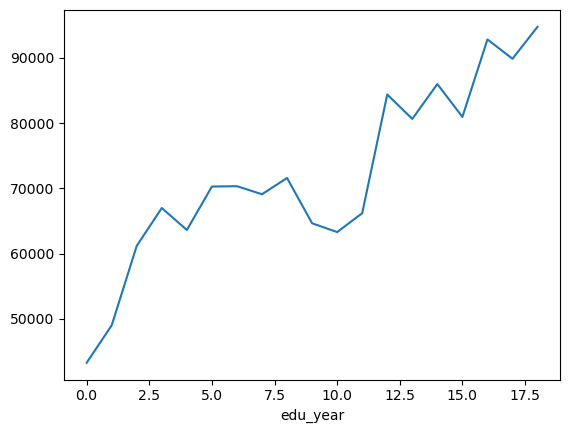

In [11]:
df_income_pkl.groupby('edu_year')['income_at_23'].apply(np.nanmean).plot(kind='line')

<Axes: xlabel='edu_year'>

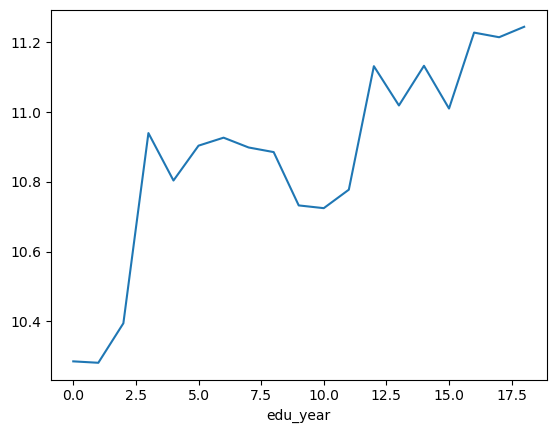

In [12]:
df_income_pkl.groupby('edu_year')['ln_income_at_23'].apply(np.nanmean).plot(kind='line')

<Axes: title={'center': 'ln_income_at_23'}, xlabel='[edu_year]'>

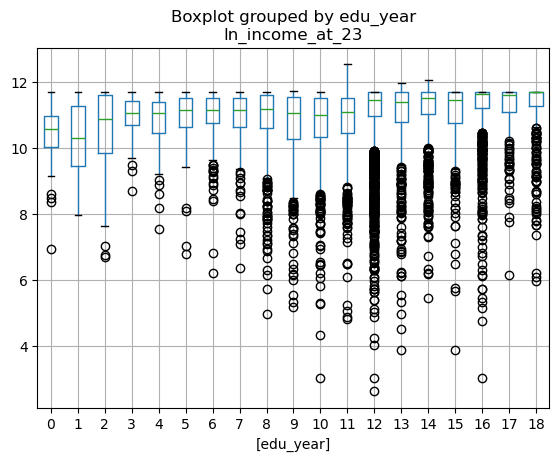

In [14]:
df_income_pkl[['ln_income_at_23','edu_year']].boxplot(by='edu_year')